In [1]:
# Import the libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the libraries
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Splitting the Data in train and test
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.cluster import KMeans,AgglomerativeClustering #KMeans clustering Library

In [6]:
# Importing Required ML Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score

In [7]:
train= pd.read_csv("C://Users//AMIT YADAV//Downloads//UNSUPERVISED LEARNING//datasets//house price data//train.csv")

In [10]:
test=pd.read_csv("C://Users//AMIT YADAV//Downloads//UNSUPERVISED LEARNING//datasets//house price data//test.csv")

In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.shape

(1460, 81)

In [11]:
test.shape

(1459, 80)

In [11]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [12]:
#checking if data columns have '?' where the columns are object

In [13]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
cols=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [15]:
np.dtype(train.iloc[:,3])
#here dtype will tell me the type

dtype('float64')

In [16]:
train.iloc[:,3].name
#it will tell me the name of the column

'LotFrontage'

In [17]:
#apply loop
for i in cols:
    if np.dtype(train[i]).name=='object':
        print(i,' ',sum(train[i]=='?'))

MSZoning   0
Street   0
Alley   0
LotShape   0
LandContour   0
Utilities   0
LotConfig   0
LandSlope   0
Neighborhood   0
Condition1   0
Condition2   0
BldgType   0
HouseStyle   0
RoofStyle   0
RoofMatl   0
Exterior1st   0
Exterior2nd   0
MasVnrType   0
ExterQual   0
ExterCond   0
Foundation   0
BsmtQual   0
BsmtCond   0
BsmtExposure   0
BsmtFinType1   0
BsmtFinType2   0
Heating   0
HeatingQC   0
CentralAir   0
Electrical   0
KitchenQual   0
Functional   0
FireplaceQu   0
GarageType   0
GarageFinish   0
GarageQual   0
GarageCond   0
PavedDrive   0
PoolQC   0
Fence   0
MiscFeature   0
SaleType   0
SaleCondition   0


In [18]:
#alley
train.Alley.value_counts()
#so remove Alley column because lots of missing values

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [19]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [20]:
#filling missing values
#imputting Lotfrontage median value
train.LotFrontage.fillna(value=69,inplace=True)
test.LotFrontage.fillna(value=69,inplace=True)

In [21]:
# imputting masonry veener
train.MasVnrType.fillna(value='None', inplace=True)
test.MasVnrType.fillna(value='None', inplace=True)

In [22]:
train.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


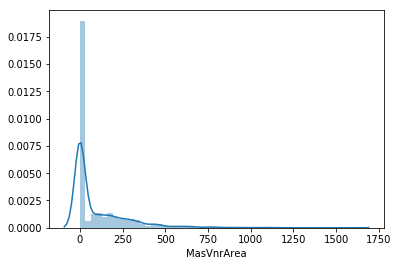

In [23]:
sns.distplot(train.MasVnrArea.dropna())
#showing highly skewed data

In [24]:
#masnry veener area
train.MasVnrArea.fillna(value=0,inplace=True)
test.MasVnrArea.fillna(value=0,inplace=True)

In [25]:
train.BsmtQual.value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [26]:
train.BsmtQual.fillna(value='TA',inplace=True)
test.BsmtQual.fillna(value='TA',inplace=True)

In [27]:
#basement exposure
train.BsmtExposure.fillna(value='No',inplace=True)
test.BsmtExposure.fillna(value='No',inplace=True)

In [28]:
train.BsmtCond.fillna(value='TA',inplace=True)
test.BsmtCond.fillna(value='TA',inplace=True)

In [29]:
train.BsmtFinType1.fillna(value='Unf',inplace=True)
test.BsmtFinType1.fillna(value='Unf',inplace=True)

In [30]:
train.BsmtFinType2.fillna(value='Unf',inplace=True)
test.BsmtFinType2.fillna(value='Unf',inplace=True)

In [31]:
#electrical
train.Electrical.fillna(value='SBrkr',inplace=True)
test.Electrical.fillna(value='SBrkr',inplace=True)

In [32]:
#fireplace QC
train.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [33]:
train.FireplaceQu.fillna(value='Gd',inplace=True)
test.FireplaceQu.fillna(value='Gd',inplace=True)

In [34]:
train.GarageYrBlt.fillna(value=2005,inplace=True)
test.GarageYrBlt.fillna(value=2005,inplace=True)

In [35]:
train.GarageType.fillna(value='Attchd',inplace=True)
test.GarageType.fillna(value='Attchd',inplace=True)

In [36]:
train.GarageFinish.fillna(value='Unf',inplace=True)
test.GarageFinish.fillna(value='Unf',inplace=True)

In [37]:
train.GarageQual.fillna(value='TA',inplace=True)
test.GarageQual.fillna(value='TA',inplace=True)


In [38]:
train.GarageCond.fillna(value='TA',inplace=True)
test.GarageCond.fillna(value='TA',inplace=True)


In [41]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
test.MSZoning.value_counts(dropna=False)

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

In [43]:
test.MSZoning.fillna(value='RL',inplace=True)

In [44]:
newtrain=train.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1)

In [45]:
newtest=test.drop(['PoolQC','Fence','MiscFeature','Alley'],axis=1)

In [46]:
#sale type
newtest.SaleType.fillna(value='WD',inplace=True)

In [47]:
newtest.GarageArea.fillna(value=480,inplace=True)

In [48]:
newtest.GarageCars.fillna(value=2,inplace=True)

In [49]:
newtest.Functional.fillna(value='Typ',inplace=True)

In [50]:
newtest.KitchenQual.fillna(value='TA',inplace=True)

In [51]:
#BASEMENT HALF BATH AND FULL BATH
newtest.BsmtHalfBath.fillna(value=0,inplace=True)

In [52]:
newtest.BsmtFullBath.fillna(value=0,inplace=True)

In [53]:
newtest.Exterior1st.fillna(value='VinylSd',inplace=True)

In [54]:
newtest.Exterior2nd.fillna(value='VinylSd',inplace=True)

In [55]:
newtest.Utilities.fillna(value='AllPub',inplace=True)

In [56]:
newtest.Utilities.fillna(value='AllPub',inplace=True)

In [57]:
newtest.isnull().sum()[newtest.isnull().sum()>0]  #it means still there are null values in these 4 categories

BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
TotalBsmtSF    1
dtype: int64

In [58]:
newtest.BsmtFinSF1.fillna(value=350,inplace=True)

In [59]:
newtest.BsmtFinSF2.fillna(value=0,inplace=True)

In [60]:
newtest.BsmtUnfSF.fillna(value=460,inplace=True)

In [61]:
newtest.TotalBsmtSF.fillna(value=988,inplace=True)

In [62]:
newtrain.isnull().sum()[newtrain.isnull().sum()>0]
#this is the code to check the null values
#so no null  values in newtrain

Series([], dtype: int64)

In [63]:
newtest.isnull().sum()[newtest.isnull().sum()>0]  #so no null  values in newtest

Series([], dtype: int64)

In [64]:
newtest.Exterior1st.fillna(value='VinylSd',inplace=True)

In [65]:
newtest.Exterior1st.value_counts()

VinylSd    511
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [66]:
newtest.isnull().sum()[newtest.isnull().sum()>0]  #so no null  values in newtest

Series([], dtype: int64)

In [67]:
newtrain.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [68]:
train_new =newtrain.drop(['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis=1)

In [69]:
test_new =newtest.drop(['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'],axis=1)

In [71]:
train_new.head(2) #so from original data till now we had dropped 10 columns

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,61,0,0,0,0,0,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,298,0,0,0,0,0,0,WD,Normal,181500


# Apply standard scaling and PCA

In [74]:
#first of all we have to apply one hot encoding
#by one hot encoding(OHE) we get the dummies of all the categorical columns
dummytrain=pd.get_dummies(train_new) 
dummytest=pd.get_dummies(test_new)

In [75]:
dummytrain.shape #so after applying OHE from 71 columns we get 271  columns in training data

(1460, 271)

In [76]:
dummytest.shape   #so after applying OHE from 71 columns we get 271  columns in testing data

(1459, 254)

In [77]:
#standard scaling
from sklearn.preprocessing import StandardScaler  #so after applying scaling we get mu=0 and std=1 of each column
sc=StandardScaler()
scaled_train=pd.DataFrame(sc.fit_transform(dummytrain),columns=dummytrain.columns) #this code is the way to scale the data

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [78]:
scaled_train.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [80]:
scaled_test=pd.DataFrame(sc.fit_transform(dummytest),columns=dummytest.columns)

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [81]:
#defining x and y
y=scaled_train.SalePrice

In [82]:
#through scikit learn
from sklearn.decomposition import PCA
pc=PCA(n_components=169) 

In [83]:
pca_train=pc.fit_transform(scaled_train) #through this we are fitting the scaled data in the PCA(principal component analysis)
pca_test=pc.fit_transform(scaled_test)

In [84]:
pca_train

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [86]:
pd.DataFrame(pca_train).head(2)  #doubt- what these value signifies?

,0,1,2,3,4,5,6,7,8,9,...,159,160,161,162,163,164,165,166,167,168
0,3.807941,1.744209,-2.351616,-1.866617,0.529776,-1.224073,0.633253,0.514530,-1.164984,-0.782711,...,-0.372004,-0.068573,-0.016871,0.065807,0.09664,0.089057,0.291587,0.219565,-0.135337,0.017686
1,0.103174,-3.432088,-0.554867,-0.387450,0.203462,-0.488795,-1.067326,0.651137,-0.808601,0.040972,...,2.252507,0.072222,0.437341,1.953510,0.19632,-1.378277,0.181292,0.470681,1.240052,0.515789


In [349]:
pc.explained_variance_  #eigen values  

array([1.70522525e+01, 8.08654698e+00, 6.47558661e+00, 5.47864042e+00,
       4.76625744e+00, 4.35844244e+00, 4.15038189e+00, 3.51567136e+00,
       3.23143971e+00, 3.13518431e+00, 2.99691808e+00, 2.92543169e+00,
       2.84688244e+00, 2.76743484e+00, 2.67880059e+00, 2.60596304e+00,
       2.56387970e+00, 2.50063569e+00, 2.43504178e+00, 2.41216923e+00,
       2.36100508e+00, 2.31214241e+00, 2.29257049e+00, 2.19092827e+00,
       2.17544171e+00, 2.15279239e+00, 2.07828956e+00, 2.01928851e+00,
       1.98228262e+00, 1.95379465e+00, 1.93598210e+00, 1.91918507e+00,
       1.86796040e+00, 1.86130093e+00, 1.82776498e+00, 1.77682019e+00,
       1.77110643e+00, 1.74699304e+00, 1.70580642e+00, 1.68870774e+00,
       1.65568929e+00, 1.64498432e+00, 1.61332978e+00, 1.60275773e+00,
       1.58558736e+00, 1.57550712e+00, 1.52501722e+00, 1.51458875e+00,
       1.49758749e+00, 1.48084181e+00, 1.47316624e+00, 1.45325294e+00,
       1.44821573e+00, 1.43057701e+00, 1.41371657e+00, 1.40481715e+00,
      

In [352]:
pc.explained_variance_ratio_ 

array([0.06735401, 0.03194073, 0.02557766, 0.02163986, 0.01882605,
       0.01721524, 0.01639343, 0.01388641, 0.01276373, 0.01238354,
       0.01183741, 0.01155505, 0.01124479, 0.01093098, 0.01058089,
       0.01029319, 0.01012697, 0.00987716, 0.00961807, 0.00952773,
       0.00932564, 0.00913264, 0.00905533, 0.00865386, 0.00859269,
       0.00850323, 0.00820895, 0.00797591, 0.00782974, 0.00771721,
       0.00764686, 0.00758051, 0.00737818, 0.00735188, 0.00721942,
       0.00701819, 0.00699562, 0.00690038, 0.0067377 , 0.00667016,
       0.00653974, 0.00649746, 0.00637243, 0.00633067, 0.00626285,
       0.00622303, 0.0060236 , 0.00598241, 0.00591526, 0.00584912,
       0.0058188 , 0.00574014, 0.00572025, 0.00565057, 0.00558398,
       0.00554883, 0.00547213, 0.00544442, 0.0053702 , 0.00531089,
       0.00525045, 0.0051878 , 0.00516971, 0.00508481, 0.00502534,
       0.00501031, 0.00500348, 0.00491837, 0.00484492, 0.00477552,
       0.00474506, 0.00467341, 0.00466206, 0.00459882, 0.00454

In [384]:
pca_train.shape

(1460, 169)

In [385]:
pca_test.shape

(1459, 169)

Text(0.5, 1.0, 'pca components')

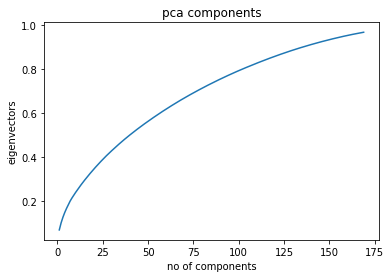

In [357]:
#plot to find the no. of components

plt.plot(range(1,170),np.cumsum(pc.explained_variance_ratio_),markerfacecolor='red',markersize=10)
plt.xlabel('no of components')
plt.ylabel('eigenvectors')
plt.title('pca components')

In [383]:
sum(np.cumsum(pc.explained_variance_ratio_)<=0.95)   #here we find the sum of number of components

158

In [381]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [361]:
pred_lr=lr.fit(pca_train,y).predict(pca_test)

In [362]:
pred_lr

array([-1.09154932,  0.14181674,  0.17233332, ...,  0.59249263,
       -0.32650458,  0.44665433])

In [363]:
savekaro=sc.fit_transform(pd.DataFrame(train.SalePrice))

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [368]:
sale=sc.inverse_transform(pred_lr)  #apply inverse transform

In [369]:
#preparing the data for submission
solution=pd.DataFrame({'Id':test.Id,'SalePrice':sale})

In [371]:
#export
solution.to_csv('LR Model.csv',index=False)

In [373]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()


In [374]:
pred_tree=reg.fit(pca_train,y).predict(pca_test)

In [375]:
sale=sc.inverse_transform(pred_tree)  #apply inverse transform

In [376]:
#preparing the data for submission
solution=pd.DataFrame({'Id':test.Id,'SalePrice':sale})
#export
solution.to_csv('DTREE.csv',index=False)

In [377]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [378]:
rf_pred=rf.fit(pca_train,y).predict(pca_test)

C:\Users\AMIT YADAV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [379]:
sale=sc.inverse_transform(pred_tree)  #apply inverse transform

In [380]:
#preparing the data for submission
solution=pd.DataFrame({'Id':test.Id,'SalePrice':sale})
#export
solution.to_csv('Randomforest.csv',index=False)